Define the sampling rate of the signal.

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

sampling_rate = 192000

# main signal frequency
frequency = sampling_rate/100
t = np.arange(0, 3*(1/frequency), (1/sampling_rate))

Impulse response of the fiter.

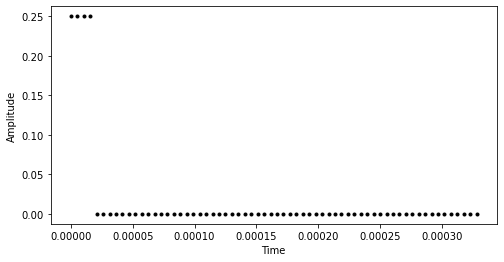

In [119]:
# create a normalized discrete retangular pulse (n = taps)
def retangular_pulse(t, n):
    x = np.zeros(len(t))
    for i in range(0, len(t)):
        if t[i] < t[0] or t[i] > t[n-1]:
            pass
        else:
            x[i] = 1/n
    return x

taps = [4,8,16]
pulse1 = retangular_pulse(t, taps[0])
pulse2 = retangular_pulse(t, taps[1])
pulse3 = retangular_pulse(t, taps[2])

fig = plt.subplots(figsize=(8,4))
plt.plot(t[:64], pulse1[:64], color='black', marker='.', linestyle='')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

Frequency response of the filter.

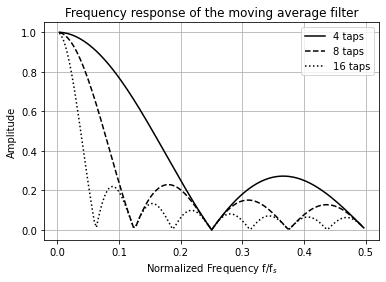

In [120]:
# FFT

# pulse1
pulse1_fft = fftpack.fft(pulse1)
power1 = abs(pulse1_fft)
freq1 = fftpack.fftfreq(pulse1.size, d=1)
# select only positive frequencies
pos_mask1 = np.where(freq1 > 0)
freq1 = freq1[pos_mask1]
power1 = power1[pos_mask1]

# pulse2
pulse2_fft = fftpack.fft(pulse2)
power2 = abs(pulse2_fft)
freq2 = fftpack.fftfreq(pulse2.size, d=1)
# select only positive frequencies
pos_mask2 = np.where(freq2 > 0)
freq2 = freq2[pos_mask2]
power2 = power2[pos_mask2]

# pulse3
pulse3_fft = fftpack.fft(pulse3)
power3 = abs(pulse3_fft)
freq3 = fftpack.fftfreq(pulse3.size, d=1)
# select only positive frequencies
pos_mask3 = np.where(freq3 > 0)
freq3 = freq3[pos_mask3]
power3 = power3[pos_mask3]

plt.plot(freq1, power1, label=str(taps[0])+' taps', color='black', marker='', linestyle='-')
plt.plot(freq2, power2, label=str(taps[1])+' taps', color='black', marker='', linestyle='--')
plt.plot(freq3, power3, label=str(taps[2])+' taps', color='black', marker='', linestyle=':')
plt.xticks(np.arange(0, 0.51, 0.1))
plt.xlabel('Normalized Frequency f/f$_{s}$')
plt.ylabel('Amplitude')
plt.title('Frequency response of the moving average filter')
plt.legend()
plt.grid()
#plt.savefig('Frequency response of the moving average filter.pdf')
plt.show()

Frequency response of the cascade.

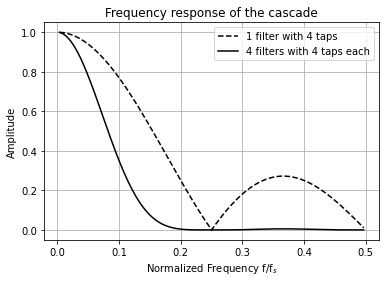

In [121]:
# FFT

# cascade
N = 4
cascade_fft = fftpack.fft(pulse1)
cascade_fft = cascade_fft**N
power_cascade = abs(cascade_fft)
freq_cascade = fftpack.fftfreq(pulse1.size, d=1)
# select only positive frequencies
pos_mask_cascade = np.where(freq_cascade > 0)
freq_cascade = freq_cascade[pos_mask_cascade]
power_cascade = power_cascade[pos_mask_cascade]

plt.plot(freq1, power1, label='1 filter with '+str(taps[0])+' taps', color='black', marker='', linestyle='--')
plt.plot(freq_cascade, power_cascade, label=str(N)+' filters with '+str(taps[0])+' taps each', color='black', marker='', linestyle='-')
plt.xticks(np.arange(0, 0.51, 0.1))
plt.xlabel('Normalized Frequency f/f$_{s}$')
plt.ylabel('Amplitude')
plt.title('Frequency response of the cascade')
plt.legend()
plt.grid()
#plt.savefig('Frequency response of the cascade.pdf')
plt.show()

Model the signal.

In [122]:
# moving average filter algorithm
def moving_average(x, n):           
    y = np.zeros(len(x)-(n-1))
    for i in range(0, len(y)):
        y[i] = np.sum(x[i:i+n])/n 
    return y

# taps
n = 4 
# main signal component
amplitude = 10
x0 = amplitude*np.sin(2*np.pi*frequency*t)
# components to be filtered
f_cutoff = (1/n)*sampling_rate
x1 = 0.3*amplitude*np.sin(2*np.pi*f_cutoff*t)
x2 = 0.2*amplitude*np.sin(2*np.pi*((1/n)+0.1)*sampling_rate*t)
x3 = 0.1*amplitude*np.sin(2*np.pi*((1/n)+0.2)*sampling_rate*t)
# gaussian noise
noise = np.random.normal(0, 1, len(t))
# complete signal
x = x0 + x1 + x2 + x3 + noise

Plot the signal.

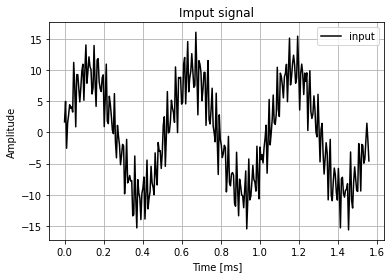

In [126]:
plt.plot(t*1000, x, label='input', color='black', marker='', linestyle='-')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.title('Imput signal')
plt.legend()
plt.grid()
#plt.savefig('Imput signal.pdf')
plt.show()

Apply the cascade.

Cascade of 4 filters with 4 taps each


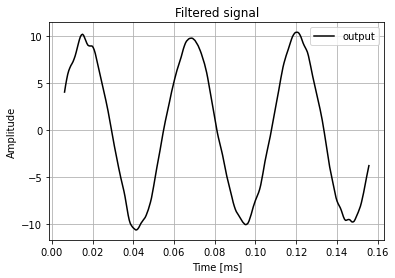

In [128]:
y_cascade = np.zeros(len(x))
# number of filters
N = 4
# number of taps of each filter
n = 4
for i in range(N):
    if i == 0:
        y_cascade = moving_average(x, n)
    else:
        y_cascade = moving_average(y_cascade, n)
        
plt.plot(t[(n-1)*N:]*100, y_cascade, label='output', color='black', marker='', linestyle='-')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.title('Filtered signal')
print('Cascade of '+str(N)+' filters with '+str(taps[0])+' taps each')
plt.legend()
plt.grid()
#plt.savefig('Filtered signal.pdf')
plt.show()

FFT of the signal.

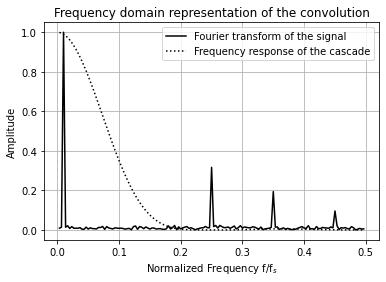

peak frequency: 1920.0000 [Hz]


In [125]:
# FFT
x_fft = fftpack.fft(x)
power_x = np.abs(x_fft)
freq_x = fftpack.fftfreq(x.size, d=1)
# select only positive frequencies
pos_mask_x = np.where(freq_x > 0)
freq_x = freq_x[pos_mask_x]
power_x = power_x[pos_mask_x]

plt.plot(freq_x, power_x/np.max(power_x), label='Fourier transform of the signal', color='black', marker='', linestyle='-')
plt.plot(freq_cascade, power_cascade, label='Frequency response of the cascade', color='black', marker='', linestyle=':')
plt.xticks(np.arange(0, 0.51, 0.1))
plt.xlabel('Normalized Frequency f/f$_{s}$')
plt.ylabel('Amplitude')
plt.title('Frequency domain representation of the convolution')
plt.legend()
plt.grid()
#plt.savefig('Frequency domain representation of the convolution.pdf')
plt.show()

# find peak frequency
peak_freq = freq_x[power_x.argmax()]
print('peak frequency:', '{:.4f}'.format(peak_freq*sampling_rate), '[Hz]')